<a href="https://colab.research.google.com/github/FilipKatulski/international-capital-investments/blob/main/wig20_etf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WIG20 i ETF - opracowanie

Filip Katulski


In [ ]:
import pandas as pd

In [ ]:
df_w20 = pd.read_csv('./ETFW20L.csv', sep=';', parse_dates=['DataTime']).dropna()
df_w20['ETF'] = df_w20['ETF'].str.replace(',', '.').astype(float)
df_w20['WIG20'] = df_w20['WIG20'].str.replace(',', '.').astype(float)

In [ ]:
df_w20

,DataTime,ETF,WIG20
0,2021-04-28,249.00,2029.64
1,2021-04-27,245.60,1998.92
2,2021-04-26,245.70,2005.10
3,2021-04-23,243.80,1986.63
4,2021-04-22,245.30,1989.73
...,...,...,...
2640,2010-09-28,261.40,2572.31
2641,2010-09-27,264.00,2602.14
2642,2010-09-24,264.00,2606.78
2643,2010-09-23,261.47,2571.35


In [ ]:
df_w20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2644
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DataTime  2645 non-null   datetime64[ns]
 1   ETF       2645 non-null   float64       
 2   WIG20     2645 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 82.7 KB


### Daily returns

In [ ]:
df_w20_daily = df_w20.copy()
df_w20_daily['ETF'] = df_w20['ETF'].pct_change(-1)
df_w20_daily['WIG20'] = df_w20['WIG20'].pct_change(-1)

In [ ]:
df_w20_daily

,DataTime,ETF,WIG20
0,2021-04-28,0.013844,0.015368
1,2021-04-27,-0.000407,-0.003082
2,2021-04-26,0.007793,0.009297
3,2021-04-23,-0.006115,-0.001558
4,2021-04-22,0.008635,0.003698
...,...,...,...
2640,2010-09-28,-0.009848,-0.011464
2641,2010-09-27,0.000000,-0.001780
2642,2010-09-24,0.009676,0.013779
2643,2010-09-23,-0.006988,-0.007699


### Weekly returns

In [ ]:
df_w20_weekly = df_w20_daily.groupby(pd.Grouper(key='DataTime', freq='W-SUN')).sum()
df_w20_weekly

,ETF,WIG20
DataTime,,
2010-09-26,0.002688,0.006080
2010-10-03,0.003135,0.001880
2010-10-10,0.003026,-0.000584
2010-10-17,0.010499,0.017515
2010-10-24,-0.000120,-0.004549
...,...,...
2021-04-04,0.016768,0.018627
2021-04-11,0.012638,0.011061
2021-04-18,0.010330,0.018843


### Monthly returns

In [ ]:
df_w20_monthly = df_w20_daily.groupby(pd.Grouper(key='DataTime', freq='M')).sum()
df_w20_monthly

,ETF,WIG20
DataTime,,
2010-09-30,0.007143,0.009459
2010-10-31,0.016964,0.014571
2010-11-30,-0.003303,-0.014235
2010-12-31,0.072073,0.050226
2011-01-31,-0.051897,-0.013203
...,...,...
2020-12-31,0.095811,0.083414
2021-01-31,-0.017357,-0.015568
2021-02-28,-0.024512,-0.019790


### Plot returns

In [ ]:
import matplotlib.pyplot as plt

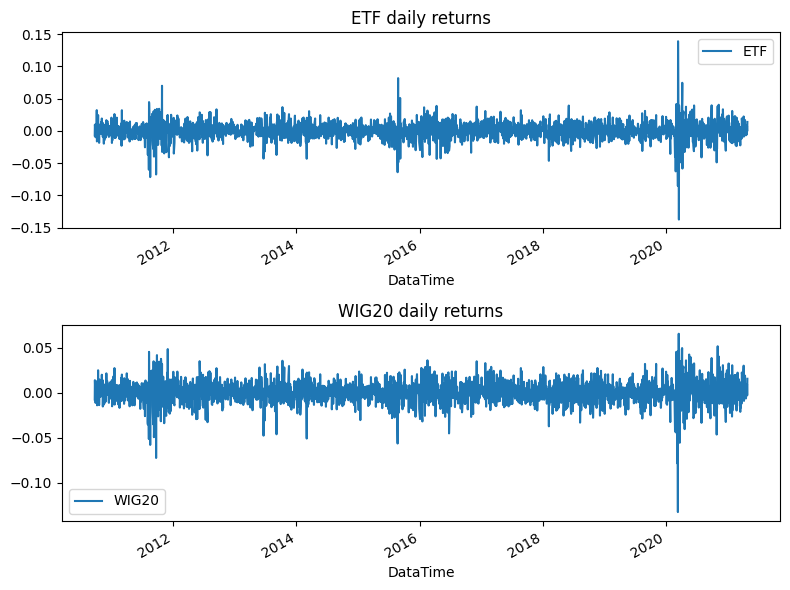

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
df_w20_daily.plot(x='DataTime', y='ETF', title='ETF daily returns', ax=ax[0])
df_w20_daily.plot(x='DataTime', y='WIG20', title='WIG20 daily returns', ax=ax[1])
plt.tight_layout()
plt.show()

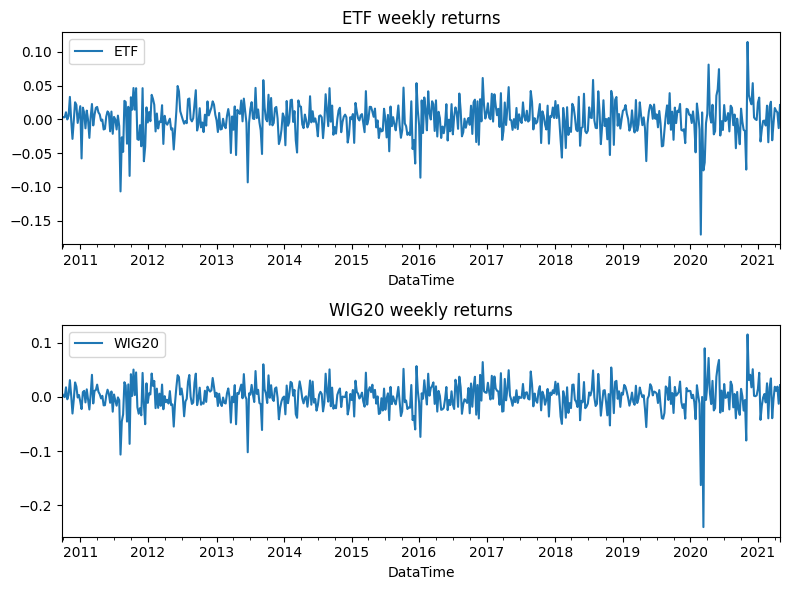

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
df_w20_weekly.reset_index().plot(x='DataTime', y='ETF', title='ETF weekly returns', ax=ax[0])
df_w20_weekly.reset_index().plot(x='DataTime', y='WIG20', title='WIG20 weekly returns', ax=ax[1])
plt.tight_layout()
plt.show()

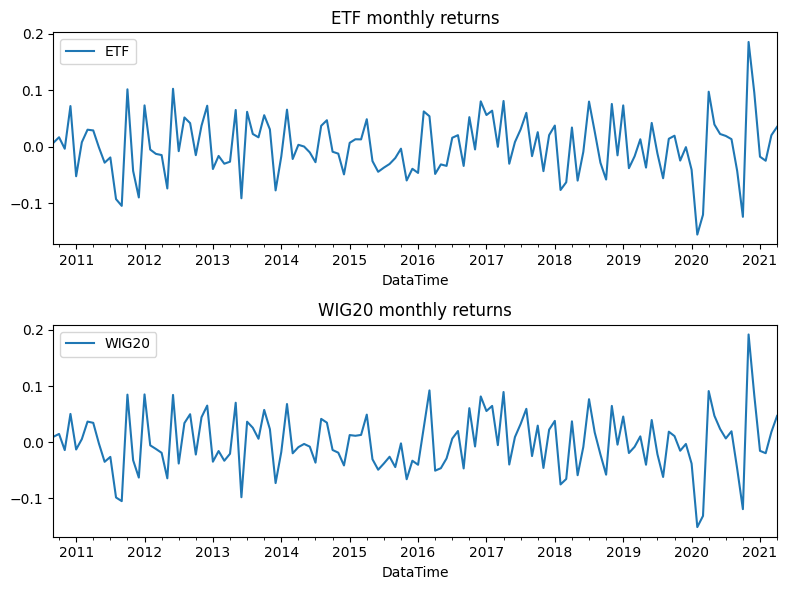

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
df_w20_monthly.reset_index().plot(x='DataTime', y='ETF', title='ETF monthly returns', ax=ax[0])
df_w20_monthly.reset_index().plot(x='DataTime', y='WIG20', title='WIG20 monthly returns', ax=ax[1])
plt.tight_layout()
plt.show()

### Cumulative returns

In [ ]:
df_w20_daily['ETF_cum'] = df_w20_daily['ETF'].add(1).cumprod() - 1
df_w20_daily['WIG20_cum'] = df_w20_daily['WIG20'].add(1).cumprod() - 1
df_w20_weekly['ETF_cum'] = df_w20_weekly['ETF'].add(1).cumprod() - 1
df_w20_weekly['WIG20_cum'] = df_w20_weekly['WIG20'].add(1).cumprod() - 1
df_w20_monthly['ETF_cum'] = df_w20_monthly['ETF'].add(1).cumprod() - 1
df_w20_monthly['WIG20_cum'] = df_w20_monthly['WIG20'].add(1).cumprod() - 1

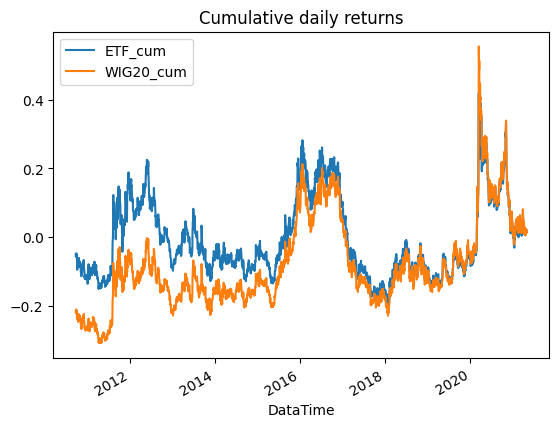

In [ ]:
df_w20_daily.plot(x='DataTime', y=['ETF_cum', 'WIG20_cum'], title='Cumulative daily returns')
plt.show()

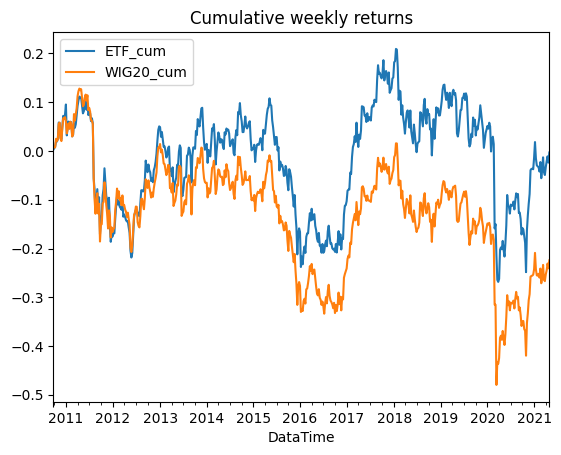

In [ ]:
df_w20_weekly.reset_index().plot(x='DataTime', y=['ETF_cum', 'WIG20_cum'], title='Cumulative weekly returns')
plt.show()

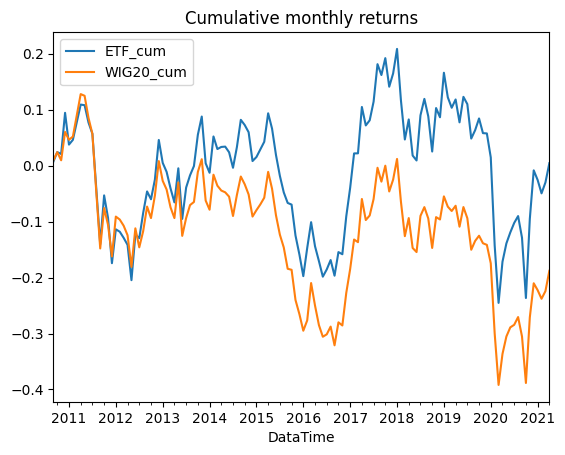

In [ ]:
df_w20_monthly.reset_index().plot(x='DataTime', y=['ETF_cum', 'WIG20_cum'], title='Cumulative monthly returns')
plt.show()

### Correlation

In [ ]:
df_w20[['ETF', 'WIG20']].corr()

,ETF,WIG20
ETF,1.000000,0.824085
WIG20,0.824085,1.000000


In [ ]:
df_w20_daily[['ETF', 'WIG20']].corr()

,ETF,WIG20
ETF,1.000000,0.825117
WIG20,0.825117,1.000000


In [ ]:
df_w20_weekly[['ETF', 'WIG20']].corr()

,ETF,WIG20
ETF,1.000000,0.899906
WIG20,0.899906,1.000000


In [ ]:
df_w20_monthly[['ETF', 'WIG20']].corr()

,ETF,WIG20
ETF,1.000000,0.979804
WIG20,0.979804,1.000000


### t-test

In [ ]:
from scipy.stats import pearsonr

In [ ]:
pd.DataFrame([
  pearsonr(df_w20['ETF'], df_w20['WIG20']),
  pearsonr(df_w20_daily.dropna()['ETF'], df_w20_daily.dropna()['WIG20']),
  pearsonr(df_w20_weekly['ETF'], df_w20_weekly['WIG20']),
  pearsonr(df_w20_monthly['ETF'], df_w20_monthly['WIG20']),
], index=['price', '1d', '1w', '1m'])

,statistic,pvalue
price,0.824085,0.000000e+00
1d,0.825117,0.000000e+00
1w,0.899906,4.156947e-201
1m,0.979804,6.000381e-90


### Normality test

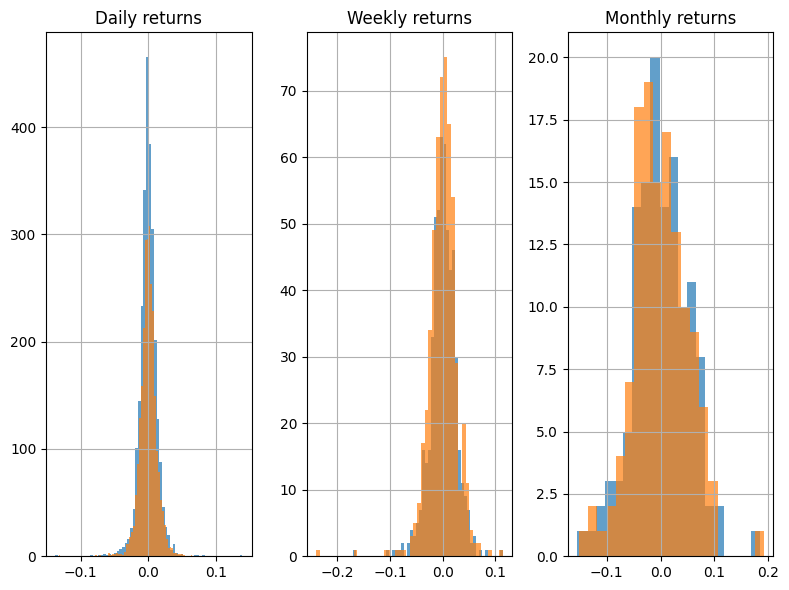

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(8, 6))
df_w20_daily.hist('ETF', bins=70, ax=ax[0], alpha=0.7)
df_w20_daily.hist('WIG20', bins=70, ax=ax[0], alpha=0.7)
ax[0].set_title("Daily returns")

df_w20_weekly.hist('ETF', bins=50, ax=ax[1], alpha=0.7)
df_w20_weekly.hist('WIG20', bins=50, ax=ax[1], alpha=0.7)
ax[1].set_title("Weekly returns")

df_w20_monthly.hist('ETF', bins=20, ax=ax[2], alpha=0.7)
df_w20_monthly.hist('WIG20', bins=20, ax=ax[2], alpha=0.7)
ax[2].set_title("Monthly returns")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro, jarque_bera, norm, kstest

#### Shapiro

In [ ]:
pd.DataFrame([
  shapiro(df_w20_daily.dropna()['ETF']),
  shapiro(df_w20_daily.dropna()['WIG20']),
  shapiro(df_w20_weekly.dropna()['ETF']),
  shapiro(df_w20_weekly.dropna()['WIG20']),
  shapiro(df_w20_monthly.dropna()['ETF']),
  shapiro(df_w20_monthly.dropna()['WIG20'])
], index=['ETF1d', 'WIG201d', 'ETF1w', 'WIG201w', 'ETF1m', 'WIG201m'])

,statistic,pvalue
ETF1d,0.918369,1.307993e-35
WIG201d,0.947266,8.498897e-30
ETF1w,0.950433,1.121216e-12
WIG201w,0.898221,1.011658e-18
ETF1m,0.989694,4.584880e-01
WIG201m,0.984219,1.440855e-01


#### Jarque Bera

In [ ]:
pd.DataFrame([
  jarque_bera(df_w20_daily.dropna()['ETF']),
  jarque_bera(df_w20_daily.dropna()['WIG20']),
  jarque_bera(df_w20_weekly.dropna()['ETF']),
  jarque_bera(df_w20_weekly.dropna()['WIG20']),
  jarque_bera(df_w20_monthly.dropna()['ETF']),
  jarque_bera(df_w20_monthly.dropna()['WIG20'])
], index=['ETF1d', 'WIG201d', 'ETF1w', 'WIG201w', 'ETF1m', 'WIG201m'])

,statistic,pvalue
ETF1d,16017.517056,0.000000e+00
WIG201d,6563.681394,0.000000e+00
ETF1w,632.445626,4.636361e-138
WIG201w,4155.116610,0.000000e+00
ETF1m,2.974980,2.259390e-01
WIG201m,5.420643,6.651543e-02


#### KS-test

In [ ]:
pd.DataFrame([
  kstest(df_w20_daily.dropna()['ETF'], norm.cdf),
  kstest(df_w20_daily.dropna()['WIG20'], norm.cdf),
  kstest(df_w20_weekly.dropna()['ETF'], norm.cdf),
  kstest(df_w20_weekly.dropna()['WIG20'], norm.cdf),
  kstest(df_w20_monthly.dropna()['ETF'], norm.cdf),
  kstest(df_w20_monthly.dropna()['WIG20'], norm.cdf)
], index=['ETF1d', 'WIG201d', 'ETF1w', 'WIG201w', 'ETF1m', 'WIG201m'])

,statistic,pvalue
ETF1d,0.480656,0.000000e+00
WIG201d,0.480391,0.000000e+00
ETF1w,0.470204,7.163673e-113
WIG201w,0.467822,1.146281e-111
ETF1m,0.451331,2.533502e-24
WIG201m,0.455451,8.753195e-25


### Wnioski

Porównując stopy zwrtu: dzienne, tygodniowe i miesięczne indeksu WIG20 oraz jego ETF można odnieść wrażenie, iż ETF dobrze odwzorowuje indeks.

Natomiast, przyglądając się skumulowanym stopom zwrotu z tych instrumentów widać wyraźną różnicę pomiędzy nimi. Można to zaobserwować na skumulowanej miesięcznej stopie zwrotu. Jest ona przez większość czasu powiększona na ETFie.  

Ceny WIG20 i ETF oraz ich stopy zwrotu są skorelowane, o czym świadczą testy na korelację. Obliczony współczynnik Pearsona jest bliski wartości 1, co oznacza niemal liniowe odzwrotowanie, co potwierdza pierwszy wniosek. Dodatkowo p-value jest równa zeru. 

Przeprowadzone testy normalności wskazują wysokie dopasowanie do rozkładu normalnego.


In [ ]:
!jupyter nbconvert --to pdf --no-input /content/wig20_etf.ipynb 

[NbConvertApp] WARNING | pattern '/content/wig20_etf.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exec